In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import os
os.chdir("D:/py/")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('Diabetes_prediction.csv')
df.head()

,EmployeeName,Patient_id,gender,D.O.B,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NATHANIEL FORD,PT101,Female,05-11-1992,0,1,never,25.19,6.6,140,0
1,GARY JIMENEZ,PT102,Female,11-11-1992,0,0,No Info,27.32,6.6,80,0
2,ALBERT PARDINI,PT103,Male,13-11-1992,0,0,never,27.32,5.7,158,0
3,CHRISTOPHER CHONG,PT104,Female,05-12-1992,0,0,current,23.45,5.0,155,0
4,PATRICK GARDNER,PT105,Male,03-01-1989,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   EmployeeName         100000 non-null  object 
 1   Patient_id           100000 non-null  object 
 2   gender               100000 non-null  object 
 3   D.O.B                100000 non-null  object 
 4   hypertension         100000 non-null  int64  
 5   heart_disease        100000 non-null  int64  
 6   smoking_history      100000 non-null  object 
 7   bmi                  100000 non-null  float64
 8   HbA1c_level          100000 non-null  float64
 9   blood_glucose_level  100000 non-null  int64  
 10  diabetes             100000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ MB


In [5]:
df.describe(include="all")

,EmployeeName,Patient_id,gender,D.O.B,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000,100000,100000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,95094,100000,3,902,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Kevin Lee,PT101,Female,24-09-1995,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,9,1,58552,1248,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,NaN,NaN,NaN,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [6]:
df.isna().sum()

EmployeeName           0
Patient_id             0
gender                 0
D.O.B                  0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.nunique()

EmployeeName            95094
Patient_id             100000
gender                      3
D.O.B                     902
hypertension                2
heart_disease               2
smoking_history             6
bmi                      4247
HbA1c_level                18
blood_glucose_level        18
diabetes                    2
dtype: int64

In [8]:
df1=df.drop(['EmployeeName','gender','smoking_history','D.O.B','Patient_id'], axis=1)
df1.corr()["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

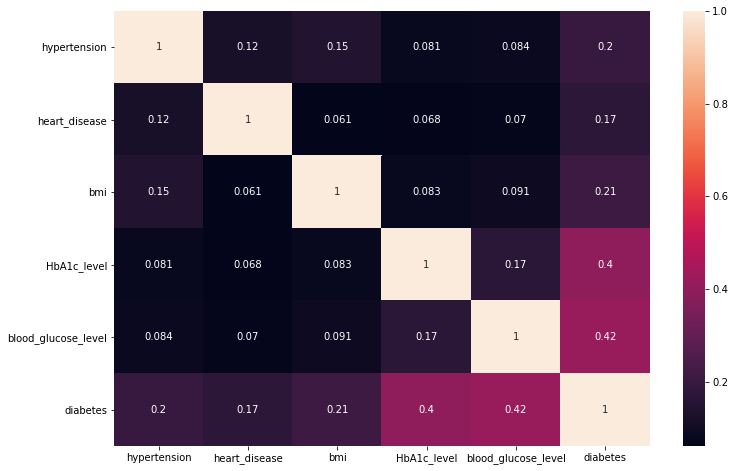

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

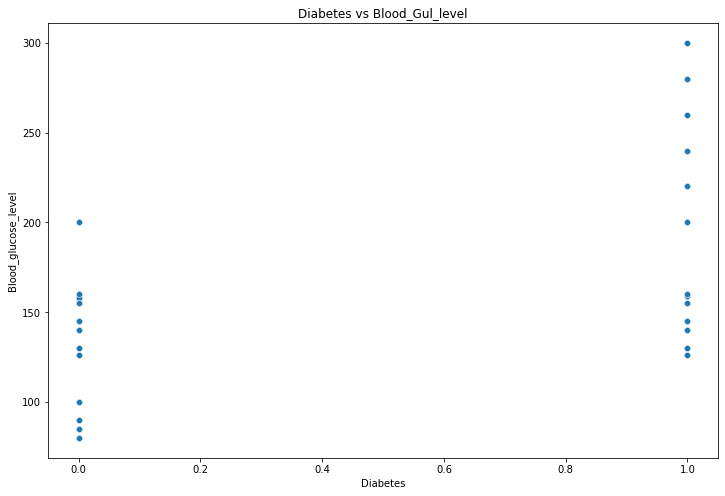

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='diabetes', y='blood_glucose_level', data=df, markers= '*')
plt.title('Diabetes vs Blood_Gul_level')
plt.xlabel('Diabetes')
plt.ylabel('Blood_glucose_level')
plt.show()

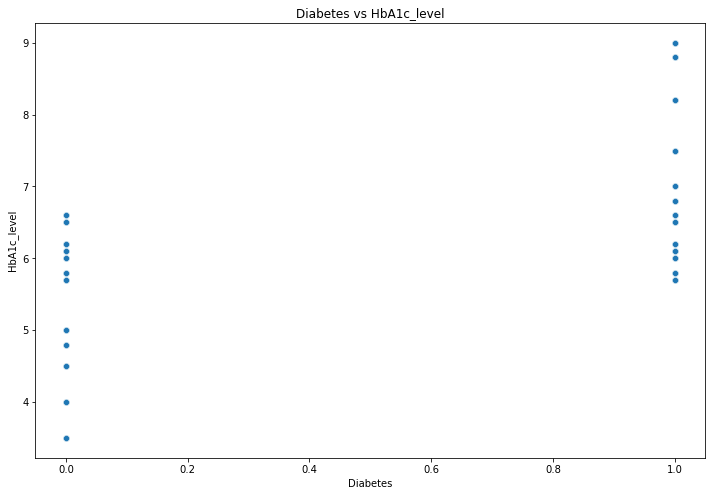

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='diabetes', y='HbA1c_level', data=df, markers= '*')
plt.title('Diabetes vs HbA1c_level')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c_level')
plt.show()

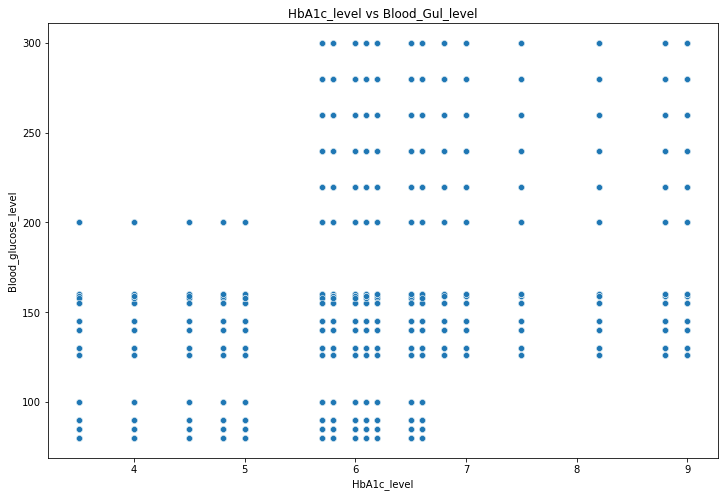

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df, markers= '*')
plt.title('HbA1c_level vs Blood_Gul_level')
plt.xlabel('HbA1c_level')
plt.ylabel('Blood_glucose_level')
plt.show()

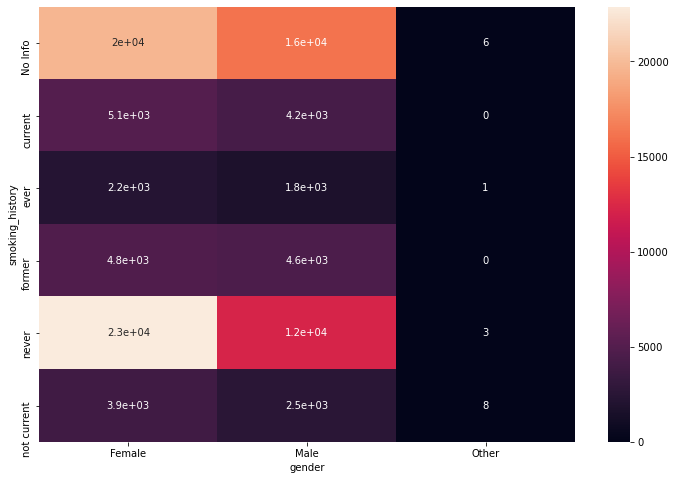

In [13]:
plt.figure(figsize=(12,8))
pltt=pd.crosstab(df['smoking_history'], df['gender'])
sns.heatmap(pltt,annot=True)
plt.show()

### define x and y

In [14]:
x= df.drop(['diabetes','Patient_id','EmployeeName','D.O.B'],axis=1)
y= df['diabetes']

## preprocessing using the pipleine

In [15]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [16]:
cat

['gender', 'smoking_history']

In [17]:
con

['hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [18]:
cat_pip=Pipeline(steps=([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder())]))
print(cat_pip)
print('_'*30)

con_pip=Pipeline(steps=([('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())]))
print(con_pip)
print('_'*30)

pre=ColumnTransformer([('cat_pipp',cat_pip,cat),('con_pipp',con_pip,con)])
pre


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())])
______________________________
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])
______________________________


ColumnTransformer(transformers=[('cat_pipp',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'smoking_history']),
                                ('con_pipp',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['hypertension', 'heart_disease', 'bmi',
                                  'HbA1c_level', 'blood_glucose_level'])])

In [19]:
x_feat=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x_feat

,cat_pipp__gender,cat_pipp__smoking_history,con_pipp__hypertension,con_pipp__heart_disease,con_pipp__bmi,con_pipp__HbA1c_level,con_pipp__blood_glucose_level
0,0.0,4.0,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,0.0,0.0,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,1.0,4.0,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,0.0,1.0,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,1.0,1.0,3.515687,4.936379,-1.081970,-0.679490,0.416183
...,...,...,...,...,...,...,...
99995,0.0,0.0,-0.284439,-0.202578,-0.000116,0.628107,-1.180558
99996,0.0,0.0,-0.284439,-0.202578,-1.499343,0.908306,-0.934905
99997,1.0,3.0,-0.284439,-0.202578,0.076729,0.161108,0.416183
99998,0.0,4.0,-0.284439,-0.202578,1.220361,-1.426688,-0.934905


In [20]:
#split
x_train, x_test, y_train, y_test = train_test_split(x_feat, y, test_size = 0.23, random_state = 62)

In [21]:
#model
lo =LogisticRegression()
dt=DecisionTreeClassifier(max_depth= 4)
ada=AdaBoostClassifier(dt,random_state= 14)
rdf=RandomForestClassifier(random_state= 23)
svc=SVC()

list1 = [lo,dt,ada,rdf,svc]
for i in list1:
    i.fit(x_train,y_train)
    y_pred_train = i.predict(x_train)
    y_pred_test = i.predict(x_test)
    
    acc = accuracy_score(y_pred_train,y_train)
    acc1 = accuracy_score(y_pred_test,y_test)
    
    print(i)
    print('accuracy_score_train = ', acc)
    print('accuracy_score_test = ', acc1) 
    print('--'*30) 

LogisticRegression()
accuracy_score_train =  0.9596233766233766
accuracy_score_test =  0.959304347826087
------------------------------------------------------------
DecisionTreeClassifier(max_depth=4)
accuracy_score_train =  0.9718441558441558
accuracy_score_test =  0.9719565217391304
------------------------------------------------------------
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   random_state=14)
accuracy_score_train =  0.9740909090909091
accuracy_score_test =  0.9701739130434782
------------------------------------------------------------
RandomForestClassifier(random_state=23)
accuracy_score_train =  0.9957012987012988
accuracy_score_test =  0.9676521739130435
------------------------------------------------------------
SVC()
accuracy_score_train =  0.9624675324675325
accuracy_score_test =  0.9629130434782609
------------------------------------------------------------


In [22]:
#tuning
grid = {
    'n_estimators': range(1, 250),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 100),
    'min_samples_split': range(2, 10),  
    'min_samples_leaf': range(1, 10)
}

# Initialize RandomizedSearchCV
rs = RandomizedSearchCV(rdf, param_distributions=grid, cv=3)

# Fit the RandomizedSearchCV instance
rs.fit(x_train, y_train)

# Get the best parameters
best_params = rs.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
rdf1 = rs.best_estimator_
print("Best Estimator:", rdf1)

list2=[rdf,rdf1]
for i in list2:
    i.fit(x_train,y_train)
    y_pred_train = i.predict(x_train)
    y_pred_test = i.predict(x_test)
    
    acc = accuracy_score(y_pred_train,y_train)
    acc1 = accuracy_score(y_pred_test,y_test)
    
    print(i)
    print('accuracy_score_train = ', acc)
    print('accuracy_score_test = ', acc1) 
    print('--'*30)


Best Parameters: {'n_estimators': 113, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini'}
Best Estimator: RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=113,
                       random_state=23)
RandomForestClassifier(random_state=23)
accuracy_score_train =  0.9957012987012988
accuracy_score_test =  0.9676521739130435
------------------------------------------------------------
RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=113,
                       random_state=23)
accuracy_score_train =  0.9718441558441558
accuracy_score_test =  0.9719565217391304
------------------------------------------------------------


In [23]:
data = pd.DataFrame(data={"Diabetes prediction Dataset": y_pred_test.flatten()})
print(data)

       Diabetes prediction Dataset
0                                1
1                                0
2                                0
3                                0
4                                0
...                            ...
22995                            0
22996                            0
22997                            0
22998                            0
22999                            0

[23000 rows x 1 columns]


 EmployeeName         100000 non-null  object 
 1   Patient_id           100000 non-null  object 
 2   gender               100000 non-null  object 
 3   D.O.B                100000 non-null  object 
 4   hypertension         100000 non-null  int64  
 5   heart_disease        100000 non-null  int64  
 6   smoking_history      100000 non-null  object 
 7   bmi                  100000 non-null  float64
 8   HbA1c_level          100000 non-null  float64
 9   blood_glucose_level  100000 non-null  int64  
 10  diabetes             100000 non-null  int64 

In [29]:


def prediction_diabetes(precess,model):  # Added model as a parameter
    # Collect user input
    gender=str(input('Enter Gender[Female, Male, Other]: '))
    hypertension = float(input('Enter hypertension[1,0]: '))
    heart_disease = float(input('Enter heart_disease[1,0]: '))
    smoking_history = str(input('Enter smoking_history[never, No info,current]: '))
    bmi = float(input('Enter bmi: '))
    HbA1c_level = float(input('Enter HbA1c_level: '))
    blood_glucose_level = int(input('Enter blood_glucose_level: '))


    diabetes_data = {
        'gender': [gender],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'smoking_history': [smoking_history],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level],
        
    }

    df_pred = pd.DataFrame(diabetes_data)

    # Transform data
    preth = pd.DataFrame(precess.fit_transform(df_pred), columns=precess.get_feature_names_out())  # Preserve column names

    # Prediction
    prediction = model.predict(preth)

    # Add prediction to DataFrame
    df_pred['diabetes_prediction'] = prediction
    
    bins = (0, 0.5, 1)
    group_names = ['NO', 'Yes']
    df_pred['diabetes'] = pd.cut(df_pred['diabetes_prediction'], bins=bins, labels=group_names)

    # Add 'diabetes_' column based on 'diabetes_prediction'
    df_pred['diabetes_'] = df_pred['diabetes_prediction'].apply(lambda x: 'No' if x == 0 else 'Yes')
    
    return df_pred



In [30]:
prediction_diabetes(pre,rdf)

Enter Gender[Female, Male, Other]: Male
Enter hypertension[1,0]: 1
Enter heart_disease[1,0]: 1
Enter smoking_history[never, No info,current]: never
Enter bmi: 34.3
Enter HbA1c_level: 2.2
Enter blood_glucose_level: 120


,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes_prediction,diabetes
0,Male,1.0,1.0,never,34.3,2.2,120,0,NaN
